<a href="https://colab.research.google.com/github/kavyaagarwal178/credit_card_fraud_detection/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy
from sklearn.metrics import classification_report,accuracy_score

### Importing Libraries for Outlier Detection

In [2]:
from sklearn.ensemble import IsolationForest

from sklearn.svm import OneClassSVM

### Reading our Dataset

In [4]:
df= pd.read_csv("/content/creditcard.csv")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


### Data Analysis

In [6]:
df.shape

(5974, 31)

#### Checking Null Values

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

### Checking the distribution of Normal and Fraud cases in our Data Set

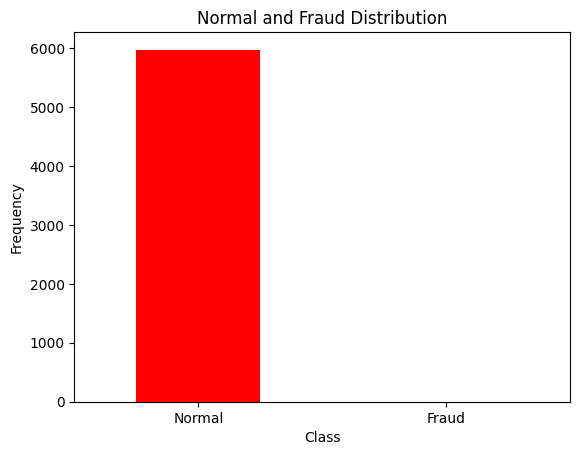

In [9]:
fraud_check = pd.value_counts(df['Class'], sort = True)
fraud_check.plot(kind = 'bar', rot=0, color= 'r')
plt.title("Normal and Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")
labels= ['Normal','Fraud']
## mapping those labels
plt.xticks(range(2), labels)
plt.show()


#### Let us see what is the shape of Normal and Fraud data set

In [10]:
fraud_people = df[df['Class']==1]
normal_people = df[df['Class']==0]

In [11]:
fraud_people.shape

(3, 31)

In [12]:
normal_people.shape

(5970, 31)

#### Finding out the avg amount in our both the data sets

In [13]:
fraud_people['Amount'].describe()

count      3.000000
mean     256.310000
std      264.880121
min        0.000000
25%      119.965000
50%      239.930000
75%      384.465000
max      529.000000
Name: Amount, dtype: float64

In [14]:
normal_people['Amount'].describe()

count    5970.000000
mean       64.965707
std       192.429839
min         0.000000
25%         4.450000
50%        15.620000
75%        56.485000
max      7712.430000
Name: Amount, dtype: float64

#### Let us analyse it visually

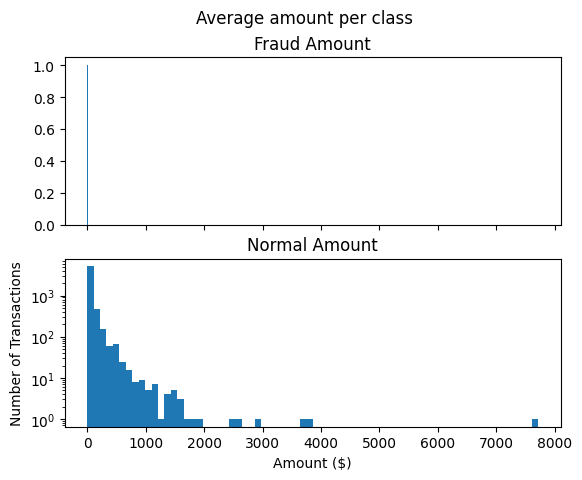

In [15]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex= True)
graph.suptitle('Average amount per class')
bins = 70

plot1.hist(fraud_people['Amount'] , bins = bins)
plot1.set_title('Fraud Amount')

plot2.hist(normal_people['Amount'] , bins = bins)
plot2.set_title('Normal Amount')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show();

#### Plotting a corr Heatmap

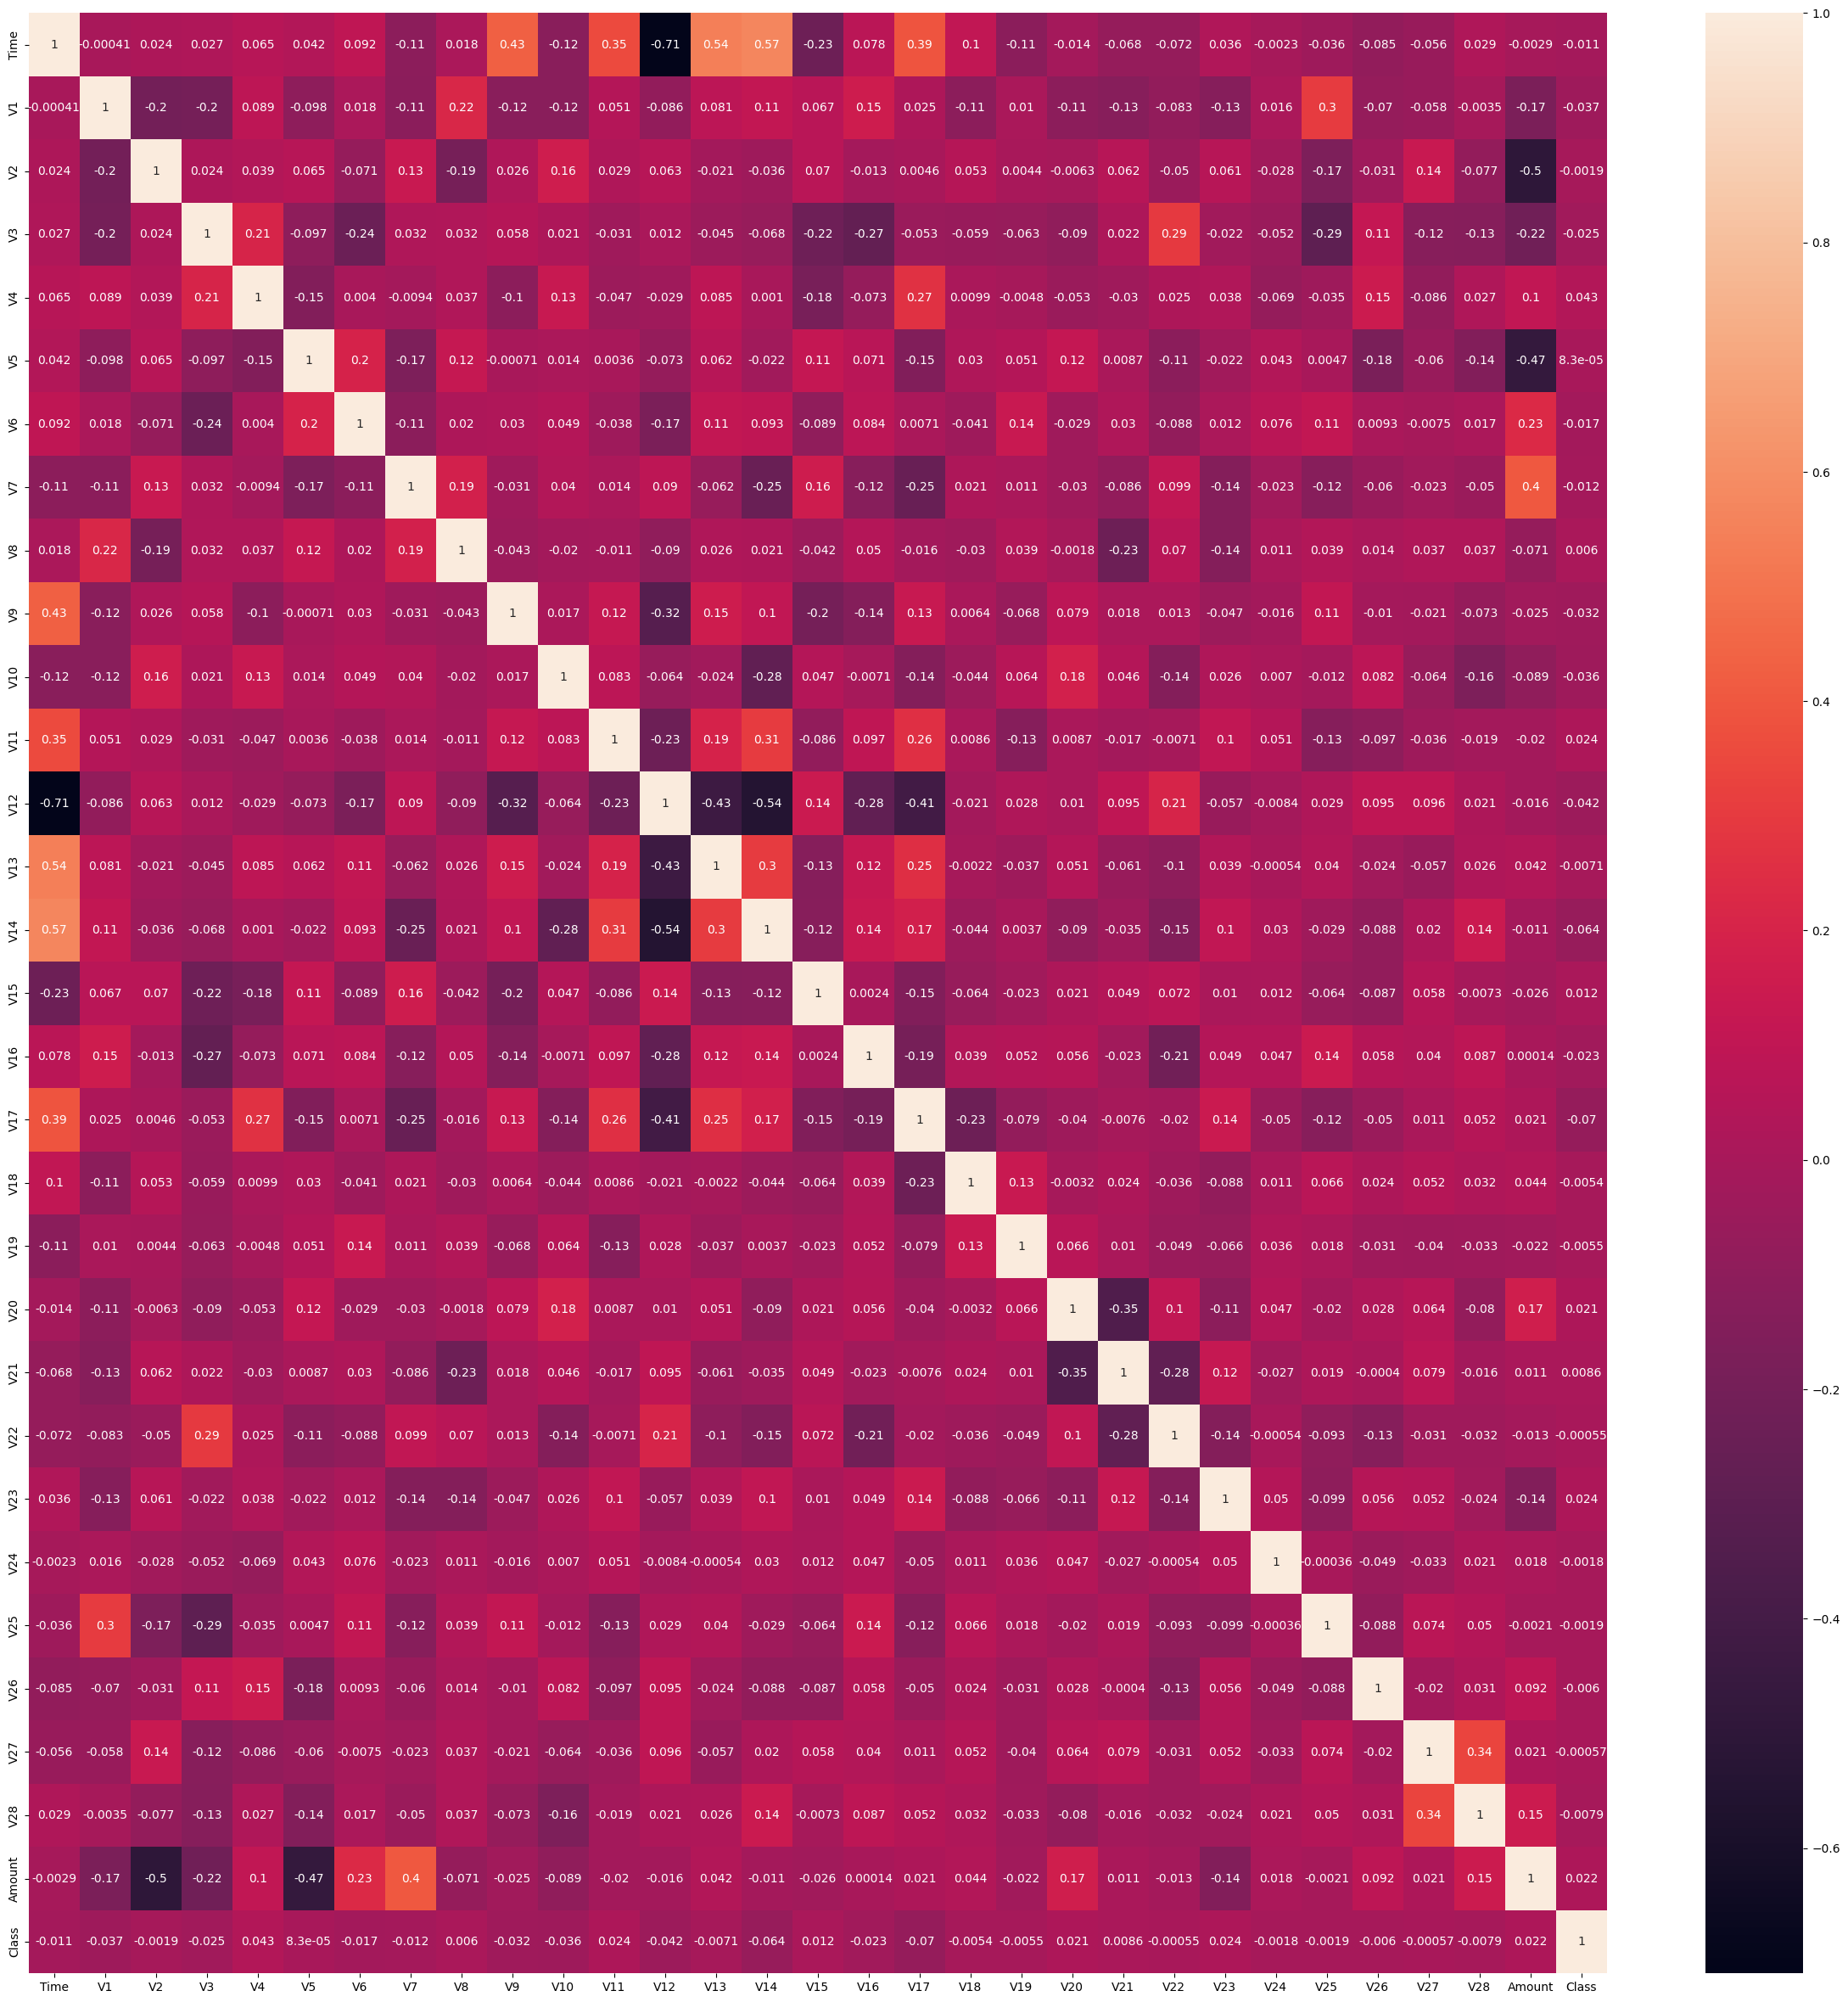

In [16]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot=True)

### Creating our Dependent and Independent Features

In [17]:
columns = df.columns.tolist()
# Making our Independent Features
columns = [var for var in columns if var not in ["Class"]]
# Making our Dependent Variable
target = "Class"
x= df[columns]
y= df[target]

In [18]:
x.shape

(5974, 30)

In [19]:
y.shape

(5974,)

In [20]:
x.head() ## Independent Variable

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [21]:
y.head() ## Dependent Variable

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Class, dtype: float64

## Model building

### Splitting the data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

### We wil be using the following Models for our Anamoly Detection:
- Isolation Forest
- OneClassSVM

## Isolation Forest

#### One of the newest techniques to detect anomalies is called Isolation Forests. The algorithm is based on the fact that anomalies are data points that are few and different. As a result of these properties, anomalies are susceptible to a mechanism called isolation.

#### This method is highly useful and is fundamentally different from all existing methods. It introduces the use of isolation as a more effective and efficient means to detect anomalies than the commonly used basic distance and density measures. Moreover, this method is an algorithm with a low linear time complexity and a small memory requirement. It builds a good performing model with a small number of trees using small sub-samples of fixed size, regardless of the size of a data set.

#### Typical machine learning methods tend to work better when the patterns they try to learn are balanced, meaning the same amount of good and bad behaviors are present in the dataset.

#### How Isolation Forests Work The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. The logic argument goes: isolating anomaly observations is easier because only a few conditions are needed to separate those cases from the normal observations. On the other hand, isolating normal observations require more conditions. Therefore, an anomaly score can be calculated as the number of conditions required to separate a given observation.

#### The way that the algorithm constructs the separation is by first creating isolation trees, or random decision trees. Then, the score is calculated as the path length to isolate the observation

In [23]:
iso_forest= IsolationForest(n_estimators=100, max_samples=len(x_train),random_state=0, verbose=0)

In [25]:
x_train = x_train.dropna()
y_train = y_train.dropna()

iso_forest.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_iforest.py:307: UserWarning: max_samples (4181) is greater than the total number of samples (4180). max_samples will be set to n_samples for estimation.
  warn(


IsolationForest(max_samples=4181, random_state=0)

In [26]:
ypred= iso_forest.predict(x_test)

In [27]:
ypred

array([1, 1, 1, ..., 1, 1, 1])

#### Mapping the values as we want to have an output in 0 and 1

In [28]:
ypred[ypred == 1] = 0
ypred[ypred == -1] = 1


### Accuracy score and Matrix

In [29]:
print(accuracy_score(y_test,ypred))

0.984941438929169


In [30]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1792
         1.0       0.00      0.00      0.00         1

    accuracy                           0.98      1793
   macro avg       0.50      0.49      0.50      1793
weighted avg       1.00      0.98      0.99      1793



In [31]:
from sklearn.metrics import confusion_matrix

In [32]:
confusion_matrix(y_test, ypred)

array([[1766,   26],
       [   1,    0]])

### We can also print how many errors our model have

In [33]:
n_errors = (ypred != y_test).sum()
print("Isolation Forest have {} errors.".format(n_errors))

Isolation Forest have 27 errors.


## OneClassSVM

In [35]:
svm= OneClassSVM(kernel='rbf', degree=3, gamma=0.1,nu=0.05,
                                         max_iter=-1)

In [36]:
svm.fit(x_train,y_train)

OneClassSVM(gamma=0.1, nu=0.05)

In [37]:
ypred1= svm.predict(x_test)

#### Here also we do the same thing as above, mapping our results in 0 and 1

In [38]:
ypred1[ypred1 == 1] = 0
ypred1[ypred1 == -1] = 1

### Accuracy score and Matrix

In [40]:
print(accuracy_score(y_test,ypred1))

0.020078081427774678


In [41]:
print(classification_report(y_test,ypred1))

              precision    recall  f1-score   support

         0.0       1.00      0.02      0.04      1792
         1.0       0.00      1.00      0.00         1

    accuracy                           0.02      1793
   macro avg       0.50      0.51      0.02      1793
weighted avg       1.00      0.02      0.04      1793



In [42]:
from sklearn.metrics import confusion_matrix

In [43]:
confusion_matrix(y_test, ypred)

array([[1766,   26],
       [   1,    0]])

In [44]:
n_errors = (ypred1 != y_test).sum()
print("SVM have {} errors.".format(n_errors))

SVM have 1757 errors.


## Solving the Problem Statement using PyCaret Library(Auto ML)

# PyCaret :

### Installing Pycaret

In [45]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 85.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 67.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 74.6 MB/s e

In [46]:
df= pd.read_csv("creditcard.csv")

In [47]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [49]:
!pip install scipy
from pycaret.classification import *

In [57]:
df = df.dropna()
model= setup(data= df, target= 'Class')

,Description,Value
0,Session id,4048
1,Target,Class
2,Target type,Binary
3,Original data shape,"(77337, 31)"
4,Transformed data shape,"(77337, 31)"
5,Transformed train set shape,"(54135, 31)"
6,Transformed test set shape,"(23202, 31)"
7,Numeric features,30
8,Preprocess,True
9,Imputation type,simple


In [58]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9995,0.9683,0.8269,0.9526,0.8828,0.8825,0.8860,2.5960
xgboost,Extreme Gradient Boosting,0.9995,0.9857,0.8275,0.9649,0.8878,0.8875,0.8917,0.9870
rf,Random Forest Classifier,0.9994,0.9646,0.8275,0.9287,0.8717,0.8715,0.8746,20.2780
ada,Ada Boost Classifier,0.9993,0.9880,0.7819,0.9230,0.8450,0.8446,0.8484,11.5800
dt,Decision Tree Classifier,0.9990,0.9052,0.8110,0.7907,0.8000,0.7995,0.8000,1.7570
gbc,Gradient Boosting Classifier,0.9989,0.8016,0.6896,0.7910,0.7219,0.7214,0.7302,59.1670
lda,Linear Discriminant Analysis,0.9989,0.9894,0.7434,0.7967,0.7655,0.7650,0.7672,0.4560
lr,Logistic Regression,0.9986,0.9374,0.6374,0.7708,0.6938,0.6931,0.6983,4.6010
ridge,Ridge Classifier,0.9984,0.0000,0.5610,0.7531,0.6365,0.6358,0.6459,0.1520
knn,K Neighbors Classifier,0.9976,0.6281,0.0302,0.4000,0.0562,0.0561,0.1098,3.7340


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     n_estimators=100, n_jobs=-1, oob_score=False,
                     random_state=4048, verbose=0, warm_start=False)

In [59]:
random_forest= create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9994,0.9607,0.7692,1.0000,0.8696,0.8693,0.8768
2,0.9996,1.0000,0.9231,0.9231,0.9231,0.9229,0.9229
3,0.9987,0.9622,0.7143,0.7692,0.7407,0.7401,0.7406
4,0.9991,0.9995,0.7143,0.9091,0.8000,0.7995,0.8054
5,0.9993,0.9214,0.8462,0.8462,0.8462,0.8458,0.8458
6,0.9993,0.8818,0.6923,1.0000,0.8182,0.8178,0.8317
7,0.9996,0.9996,0.9231,0.9231,0.9231,0.9229,0.9229
8,0.9994,0.9606,0.8462,0.9167,0.8800,0.8797,0.8804


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### As we see we have a very good Kappa score which is often seen in an Imbalanced dataset

In [60]:
random_forest

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=-1, oob_score=False,
                       random_state=4048, verbose=0, warm_start=False)

### We can Hypertune our model to

In [65]:
tuned_model = classification.tune_model(random_forest)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,09:56:26
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Classifier


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: ignored

## Predictions

In [66]:
pred_holdout = predict_model(random_forest,data= x_test)

In [67]:
pred_holdout

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,prediction_label,prediction_score
5956,6604,-0.965886,1.400465,0.546106,-1.072728,0.724582,0.082179,-0.139567,-2.800433,0.547775,...,-1.261180,0.014465,-1.098688,-0.215454,0.512105,-0.080029,0.096885,28.480000,0,1.0
4332,3760,1.325005,-0.809991,-0.959412,-1.584234,1.419297,3.288968,-1.117940,0.700098,0.355454,...,-0.919116,0.046413,0.922049,0.342520,-0.512596,-0.027397,0.022321,81.480003,0,1.0
2584,2113,-2.746065,3.022169,-0.134017,-0.386662,-0.244242,0.742847,-1.653331,-6.059684,0.366991,...,-2.935378,0.817265,-0.638756,0.153555,0.152716,0.342278,-0.076196,9.870000,0,1.0
1755,1356,1.057470,0.003263,0.339138,1.443896,-0.241933,-0.177943,0.115970,-0.009037,0.343912,...,-0.116413,-0.106484,0.074245,0.629171,-0.316821,0.026968,0.024700,63.650002,0,1.0
4687,4112,-3.104906,1.210301,0.248620,-1.366092,-2.909295,-0.696190,-2.127176,2.164399,-0.098288,...,0.894100,-0.098820,0.459199,0.024300,-0.289626,-0.798323,-0.272227,49.950001,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,2022,-0.823063,0.340529,1.718410,-0.477659,0.401239,-0.795040,1.090103,-0.428970,0.213843,...,0.260887,0.091387,0.396300,-0.480707,0.159072,-0.115310,-0.219649,46.400002,0,1.0
4734,4173,-0.846989,1.323506,1.425198,0.093438,-0.159451,-0.228827,0.074472,0.552151,0.440827,...,-0.525292,0.084526,0.143834,-0.322692,0.034621,0.126771,0.040075,2.340000,0,1.0
3311,2861,1.246604,0.044227,0.425749,-0.136354,-0.598568,-0.988721,-0.039981,-0.125174,-0.088957,...,-0.500848,0.123579,0.581408,0.118773,0.816961,-0.089558,-0.004000,1.000000,0,1.0
4561,3883,1.194380,0.383512,1.056911,2.726360,-0.150432,0.574689,-0.494482,0.056893,1.317551,...,0.048494,-0.189115,-0.477405,0.627251,0.161887,0.002687,0.014049,6.070000,0,1.0
